In [1]:
import numpy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import InterpolatedUnivariateSpline as interpolate

In [2]:
from nbodykit.lab import FFTPower, BigFileMesh, BigFileCatalog
from pmesh.pm import ParticleMesh as PM

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/dask/context.py:23: UserWarning: The dask.set_options function has been deprecated. Please use dask.config.set instead
  warnings.warn("The dask.set_options function has been deprecated. "


In [3]:
import sys
sys.path.append('../Py_codes/modules/')

import mymass_function as massfunc

In [4]:
feg = BigFileCatalog('/global/cscratch1/sd/yfeng1/m3127/highres/%d-test/fof_0.0100'%2048)
omM =  float(feg.attrs['Omega0'])
mf = massfunc.Mass_Func('./pk_Planck2018BAO_matterpower_z000.dat', M=omM)


aa=np.array([0.0909, 0.1111, 0.1667, 0.2000, 0.2500, 0.2857])
zz=(1/aa-1)
na = len(aa)
nmin, nmax, nn = 23.1, 1000, 8
nv = np.array([23, 39, 68, 116, 200, 341, 584, 1000])

mtest = np.logspace(8, 15, 1000)
stnumd = [mf.STf(mtest, i) for i in aa]
istcumnum = [interpolate(np.log(mtest), np.array([np.trapz(stnumd[j][i:]/mtest[i:], mtest[i:]) for i in range(mtest.size)])) for j in range(len(stnumd))]

# 2048

In [5]:
bs = 200
nc = 2048

#
feg = BigFileCatalog('/global/cscratch1/sd/yfeng1/m3127/highres/%d-test/fof_0.0100'%nc)
mp = feg.attrs['M0']*1e10
omM =  float(feg.attrs['Omega0'])
klin, plin = np.loadtxt('./pk_Planck2018BAO_matterpower_z000.dat').T

mms = nv*mp
pm = PM(BoxSize=200, Nmesh=[256]*3)


In [6]:
powersh = []
powershh = []
powersm = []
hpos, hmass = [], []
mbins = []
for i in range(aa.size):
    powersm.append(np.loadtxt('%d-test/power_%0.4f-a-matter-power.txt'%(nc, aa[i]), dtype='complex128').real)
    feg = BigFileCatalog('/global/cscratch1/sd/yfeng1/m3127/highres/%d-test/fof_%0.4f'%(nc, aa[i]))
    hpos.append(feg['LL-0.200/Position'].compute())
    hmass.append(feg['LL-0.200/Length'].compute())
    hm, hp = hmass[-1], hpos[-1]
    tmp, tmp2 = [], []
    for j in range(nv.size):
        tmp.append(np.loadtxt('%d-test/power_%0.4f-x-nmin-%05d-power.txt'%(nc, aa[i], nv[j]), dtype='complex128').real)
        try:
#             print(((hm > nv[j]) & (hm < nv[j+1])).sum())
            mesh = pm.paint(hp[(hm > nv[j]) & (hm < nv[j+1])])
            tmp2.append(FFTPower(mesh/mesh.cmean(), mode='1d').power['power'])
            mbins.append((mp*nv[j] + mp*nv[j+1])/2.)
        except Exception as e:
            print(e)
            mesh = pm.paint(hp[(hm > nv[j])])
            tmp2.append(FFTPower(mesh/mesh.cmean(), mode='1d').power['power'])
            mbins.append((mp*nv[j] + mp*hmass[-1][0])/2.)
    powersh.append(tmp)
    powershh.append(tmp2)

powersh = np.array(powersh)
powershh = np.array(powershh)
k = np.loadtxt('%d-test/power_%0.4f-a-matter-k.txt'%(2048, aa[i]), dtype='complex128').real



/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/dask/base.py:828: UserWarning: The get= keyword has been deprecated. Please use the scheduler= keyword instead with the name of the desired scheduler like 'threads' or 'processes'
  warnings.warn("The get= keyword has been deprecated. "
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/pmesh/pm.py:340: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.value.__getitem__(index)


index 8 is out of bounds for axis 0 with size 8
index 8 is out of bounds for axis 0 with size 8
index 8 is out of bounds for axis 0 with size 8
index 8 is out of bounds for axis 0 with size 8
index 8 is out of bounds for axis 0 with size 8
index 8 is out of bounds for axis 0 with size 8


In [7]:
powershnew = []
powershhnew = []
powersmnew = []
hposnew, hmassnew = [], []
mbinsnew = []
for i in range(aa.size):
    print(i, aa[i])
    powersmnew.append(np.loadtxt('%d-test-newsteps/power_%0.4f-a-matter-power.txt'%(nc, aa[i])).real)
    feg = BigFileCatalog('/global/cscratch1/sd/yfeng1/m3127/highres/%d-test-newsteps/fof_%0.4f'%(nc, aa[i]), dataset='LL-0.200')
    hposnew.append(feg['Position'].compute())
    hmassnew.append(feg['Length'].compute())
    hm, hp = hmassnew[-1], hposnew[-1]
    tmp, tmp2 = [], []
    for j in range(nv.size):
        tmp.append(np.loadtxt('%d-test-newsteps/power_%0.4f-x-nmin-%05d-power.txt'%(nc, aa[i], nv[j])))
        try:
#             print(((hm > nv[j]) & (hm < nv[j+1])).sum())
            mesh = pm.paint(hp[(hm > nv[j]) & (hm < nv[j+1])])
            tmp2.append(FFTPower(mesh/mesh.cmean(), mode='1d').power['power'])
            mbinsnew.append((mp*nv[j] + mp*nv[j+1])/2.)
        except Exception as e:
            print(e)
            mesh = pm.paint(hp[(hm > nv[j])])
            tmp2.append(FFTPower(mesh/mesh.cmean(), mode='1d').power['power'])
            mbinsnew.append((mp*nv[j] + mp*hmass[-1][0])/2.)
    powershnew.append(tmp)
    powershhnew.append(tmp2)

powershnew = np.array(powershnew)
powershhnew = np.array(powershhnew)
k = np.loadtxt('%d-test/power_%0.4f-a-matter-k.txt'%(2048, aa[i]), dtype='complex128').real



0 0.0909
index 8 is out of bounds for axis 0 with size 8
1 0.1111
index 8 is out of bounds for axis 0 with size 8
2 0.1667
index 8 is out of bounds for axis 0 with size 8
3 0.2
index 8 is out of bounds for axis 0 with size 8
4 0.25
index 8 is out of bounds for axis 0 with size 8
5 0.2857
index 8 is out of bounds for axis 0 with size 8


In [8]:
powersh168 = []
powershh168 = []
powersm168 = []
hpos168, hmass168 = [], []
mbins168 = []
for i in range(aa.size):
    print(i, aa[i])
    powersm168.append(np.loadtxt('%d-test-0.168/power_%0.4f-a-matter-power.txt'%(nc, aa[i])).real)
    feg = BigFileCatalog('/global/cscratch1/sd/yfeng1/m3127/highres/%d-test-0.168/fof_%0.4f'%(nc, aa[i]), dataset='LL-0.168')
    hpos168.append(feg['Position'].compute())
    hmass168.append(feg['Length'].compute())
    hm, hp = hmass168[-1], hpos168[-1]
    tmp, tmp2 = [], []
    for j in range(nv.size):
        tmp.append(np.loadtxt('%d-test-0.168/power_%0.4f-x-nmin-%05d-power.txt'%(nc, aa[i], nv[j])))
        try:
#             print(((hm > nv[j]) & (hm < nv[j+1])).sum())
            mesh = pm.paint(hp[(hm > nv[j]) & (hm < nv[j+1])])
            tmp2.append(FFTPower(mesh/mesh.cmean(), mode='1d').power['power'])
            mbinsnew.append((mp*nv[j] + mp*nv[j+1])/2.)
        except Exception as e:
            print(e)
            mesh = pm.paint(hp[(hm > nv[j])])
            tmp2.append(FFTPower(mesh/mesh.cmean(), mode='1d').power['power'])
            mbinsnew.append((mp*nv[j] + mp*hmass[-1][0])/2.)
    powersh168.append(tmp)
    powershh168.append(tmp2)

powersh168 = np.array(powersh168)
powershh168 = np.array(powershh168)
k = np.loadtxt('%d-test/power_%0.4f-a-matter-k.txt'%(2048, aa[i]), dtype='complex128').real

 

0 0.0909
index 8 is out of bounds for axis 0 with size 8
1 0.1111
index 8 is out of bounds for axis 0 with size 8
2 0.1667
index 8 is out of bounds for axis 0 with size 8
3 0.2
index 8 is out of bounds for axis 0 with size 8
4 0.25
index 8 is out of bounds for axis 0 with size 8
5 0.2857
index 8 is out of bounds for axis 0 with size 8


In [9]:
numdf, biasf = [], []
for i in range(aa.size):
    t2, t1 = np.loadtxt('%d-test/power_%0.4f-bias.txt'%(2048, aa[i])).T[1:]
    numdf.append(t1)
    biasf.append(t2)

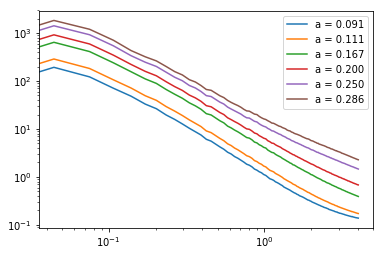

In [10]:
for i in range(na):
    plt.plot(k, powersm[i], 'C%d'%i, label='a = %0.3f'%aa[i])
plt.loglog()
plt.legend()

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


Text(0.5,0.98,'Ratio of cross spectra with auto spectra')

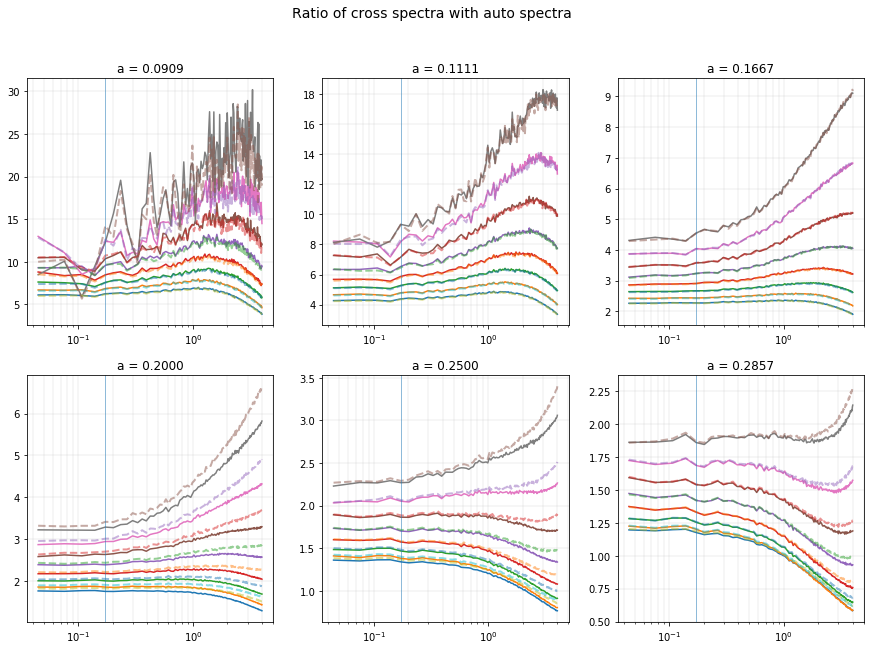

In [11]:
nkmax = 5

fig, axar = plt.subplots(2, 3, figsize = (15, 10))
for i in range(6):
    ax = axar.flatten()[i]
    ax.plot(k, powersh[i].T/powersm[i].reshape(-1, 1))
    ax.plot(k, powershnew[i].T/powersmnew[i].reshape(-1, 1), ls="--", lw=2, alpha=0.5)
    ax.set_title('a = %0.4f'%aa[i])
    ax.set_xscale('log')
    ax.axvline(k[nkmax], lw=0.5)
    ax.grid(which='both', lw=0.2)

plt.suptitle('Ratio of cross spectra with auto spectra', fontsize=14)


/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5,0.98,'Ratio of auto spectra with auto spectra')

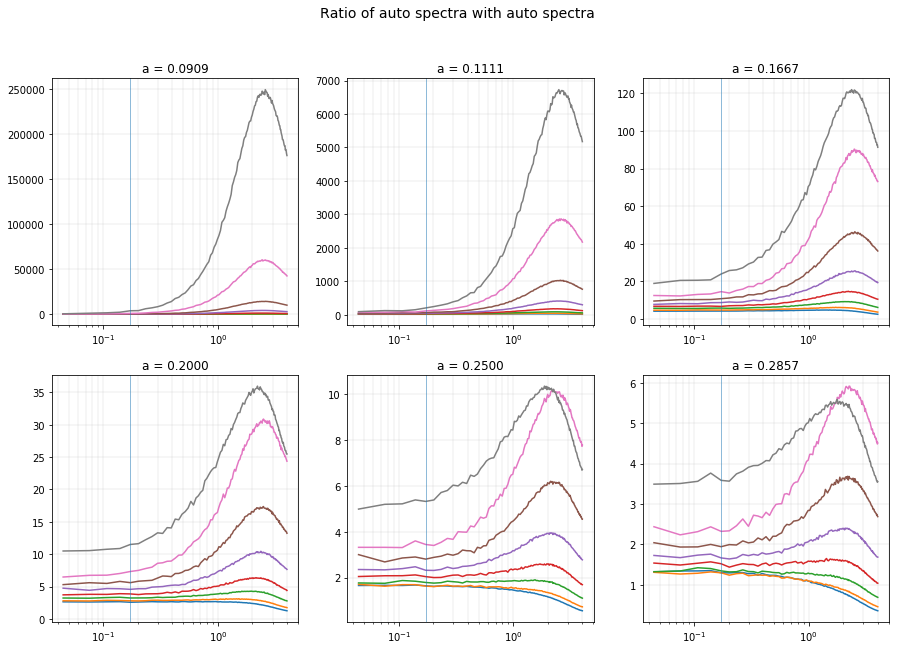

In [12]:
nkmax = 5

fig, axar = plt.subplots(2, 3, figsize = (15, 10))
for i in range(6):
    ax = axar.flatten()[i]
    ax.plot(k, powershh[i].T/powersm[i].reshape(-1, 1))
    ax.set_title('a = %0.4f'%aa[i])
    ax.set_xscale('log')
    ax.axvline(k[nkmax], lw=0.5)
    ax.grid(which='both', lw=0.2)

plt.suptitle('Ratio of auto spectra with auto spectra', fontsize=14)


/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Text(0.5,0.98,'Bias values Threshold')

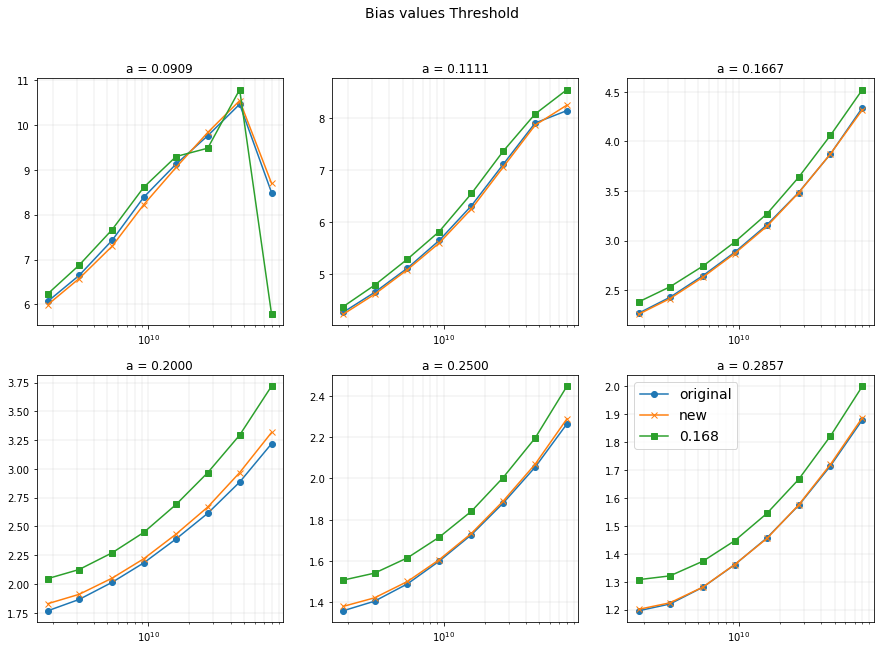

In [13]:
fig, axar = plt.subplots(2, 3, figsize = (15, 10))
bias2048 = []
bias2048168 = []
bias2048new = []

for i in range(6):
    ax = axar.flatten()[i]
    bias = (powersh[i].T/powersm[i].reshape(-1, 1))[1:nkmax].mean(axis=0)
    biasnew = (powershnew[i].T/powersmnew[i].reshape(-1, 1))[1:nkmax].mean(axis=0)
    bias168 = (powersh168[i].T/powersm168[i].reshape(-1, 1))[1:nkmax].mean(axis=0)
    
#     print(bias)
    ax.plot(mp*nv, bias, marker='o', label='original')
    ax.plot(mp*nv, biasnew, marker='x', label='new')
    ax.plot(mp*nv, bias168, marker='s', label='0.168')
    bias2048.append([mp*nv, bias])
    bias2048168.append([mp*nv, bias168])
    bias2048new.append([mp*nv, biasnew])
    ax.set_title('a = %0.4f'%aa[i])
    ax.set_xscale('log')
    ax.grid(which='both', lw=0.2)
plt.legend(fontsize = 14)
plt.suptitle('Bias values Threshold', fontsize=14)


/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


Text(0.5,0.98,'Bias values Bins')

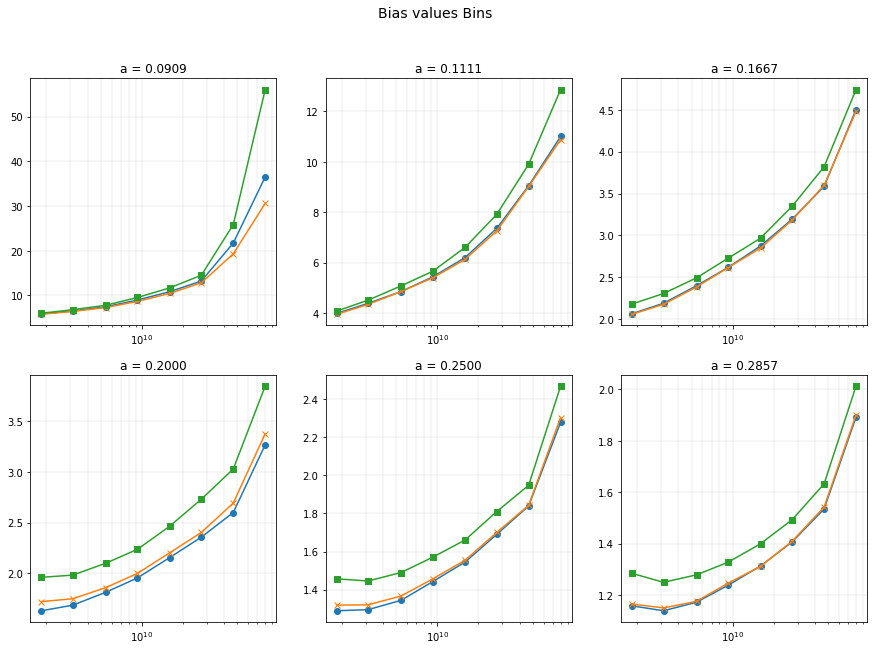

In [14]:
fig, axar = plt.subplots(2, 3, figsize = (15, 10))
bias2048a = []
bias2048168a = []
bias2048newa = []
for i in range(6):
    ax = axar.flatten()[i]
    bias = ((powershh[i].T/powersm[i].reshape(-1, 1))[1:nkmax]**0.5).mean(axis=0)
    bias168 = ((powershh168[i].T/powersm168[i].reshape(-1, 1))[1:nkmax]**0.5).mean(axis=0)
    biasnew = ((powershhnew[i].T/powersmnew[i].reshape(-1, 1))[1:nkmax]**0.5).mean(axis=0)
    ax.plot(mp*nv, bias, marker='o')
    ax.plot(mp*nv, biasnew, marker='x')
    ax.plot(mp*nv, bias168, marker='s')

    bias2048a.append([mp*nv, bias])
    bias2048newa.append([mp*nv, biasnew])
    bias2048168a.append([mp*nv, bias168])
    
    ax.set_title('a = %0.4f'%aa[i])
    ax.set_xscale('log')
    ax.grid(which='both', lw=0.2)
plt.suptitle('Bias values Bins', fontsize=14)


In [15]:
numd2048 = []
numd2048new = []
numd2048168 = []
for i in range(6):
    size = hmass[i].size
    hsort = hmass[i][::-1]
#     numd = np.array([np.where(hmass[i] < n)[0][0] for n in nv])/bs**3
    numd = (size - np.array([np.searchsorted(hsort , n) for n in nv]))/bs**3
    numd2048.append(numd)
    
    size = hmassnew[i].size
    hsort = hmassnew[i][::-1]
    numd = (size - np.array([np.searchsorted(hsort , n) for n in nv]))/bs**3
    numd2048new.append(numd)

    size = hmass168[i].size
    hsort = hmass168[i][::-1]
    numd = (size - np.array([np.searchsorted(hsort , n) for n in nv]))/bs**3
    numd2048168.append(numd)


Text(0.5,0.98,'Abundance')

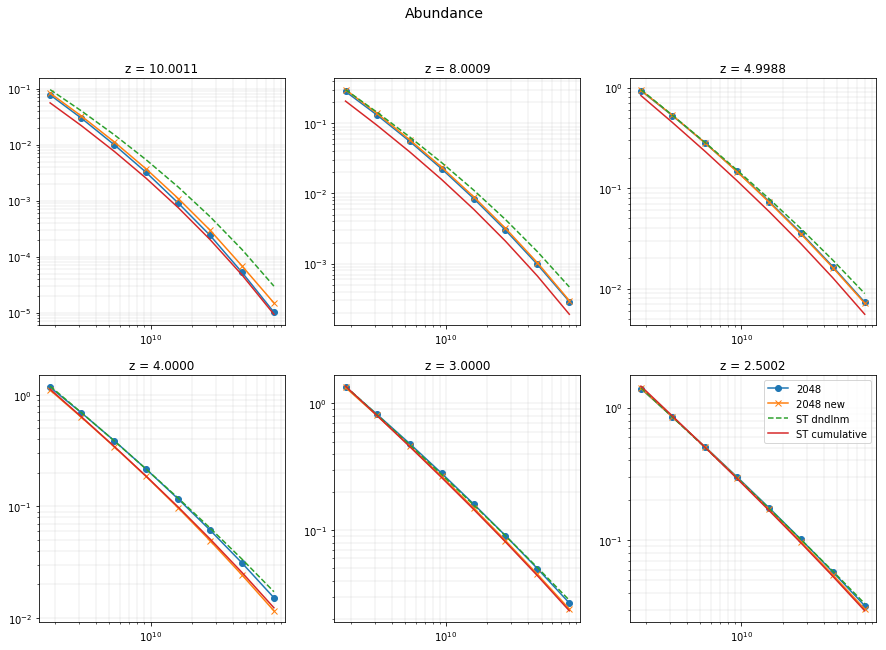

In [16]:
fig, axar = plt.subplots(2, 3, figsize = (15, 10))
for i in range(6):
    ax = axar.flatten()[i]
    
    numd = numd2048[i]
    numdnew = numd2048new[i]
    stnumd = mf.STf(mp*nv, a=aa[i], dndlnm=True)
    ax.plot(mp*nv, numd, marker='o', label='2048')
    ax.plot(mp*nv, numdnew, marker='x', label='2048 new')
    ax.plot(mp*nv, stnumd, '--', label='ST dndlnm')
    ax.plot(mp*nv, istcumnum[i](np.log(mp*nv)), '-', label='ST cumulative')
    ax.set_title('z = %0.4f'%zz[i])
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.grid(which='both', lw=0.2)
plt.legend()
plt.suptitle('Abundance', fontsize=14)
    

Text(0.5,0.98,'Abundance')

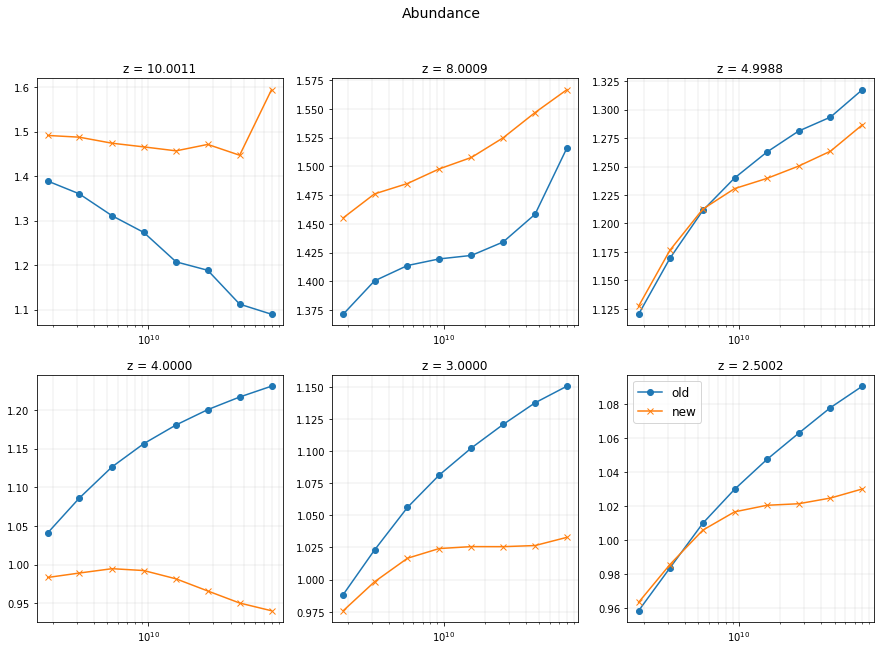

In [17]:
fig, axar = plt.subplots(2, 3, figsize = (15, 10))
for i in range(6):
    ax = axar.flatten()[i]
    numd = numd2048[i]
    numdnew = numd2048new[i]
    numd168 = numd2048[i]
    
    ax.plot(mp*nv, numd/istcumnum[i](np.log(mp*nv)), marker='o', label='old')
    ax.plot(mp*nv, numdnew/istcumnum[i](np.log(mp*nv)), marker='x', label='new')
    ax.set_title('z = %0.4f'%zz[i])
    ax.set_xscale('log')
#     ax.set_yscale('log')
    ax.grid(which='both', lw=0.2)
plt.legend(fontsize=12)
plt.suptitle('Abundance', fontsize=14)
    

# 8192

In [100]:
bs2 = 800
nc = 8192

# aa=np.array([0.0909, 0.1111, 0.1667, 0.2000, 0.2500])
aa=np.array([0.0909, 0.1111, 0.1667, 0.2000, 0.2500, 0.2857])
na = len(aa)
nmin, nmax, nn = 23.1, 1000, 8
nv = np.array([23, 39, 68, 116, 200, 341, 584, 1000])


In [87]:
powersh2 = []
powersm2 = []
hpos2, hmass2 = [], []
for i in range(aa.size-1):
    powersm2.append(np.loadtxt('%d-test/power_%0.4f-a-matter-power.txt'%(nc, aa[i]), dtype='complex128').real)
    feg = BigFileCatalog('/global/cscratch1/sd/yfeng1/m3127/highres/%d-test/fof_%0.4f'%(nc, aa[i]))
    hpos2.append(feg['LL-0.200/Position'].compute())
    hmass2.append(feg['LL-0.200/Length'].compute())
    tmp = []
    for j in range(nv.size):
        tmp.append(np.loadtxt('%d-test/power_%0.4f-x-nmin-%05d-power.txt'%(nc, aa[i], nv[j]), dtype='complex128').real)
    powersh2.append(tmp)
powersh2 = np.array(powersh2)
k2 = np.loadtxt('%d-test/power_%0.4f-a-matter-k.txt'%(nc, aa[i]), dtype='complex128').real



In [180]:
numdf2, biasf2 = [], []
for i in range(aa.size-1):
    t2, t1 = np.loadtxt('%d-test/power_%0.4f-bias.txt'%(8192, aa[i])).T[1:]
    numdf2.append(t1)
    biasf2.append(t2)
    

    

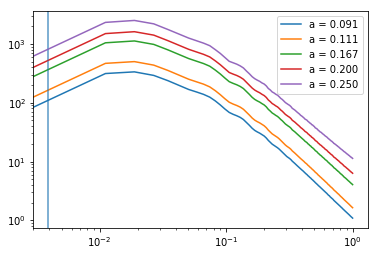

In [110]:
for i in range(na):
    plt.plot(k2, powersm2[i], 'C%d'%i, label='a = %0.3f'%aa[i])
    plt.axvline(1*np.pi/bs2, lw=0.3)
plt.loglog()
plt.legend()

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


Text(0.5,0.98,'Ratio of cross spectra with auto spectra')

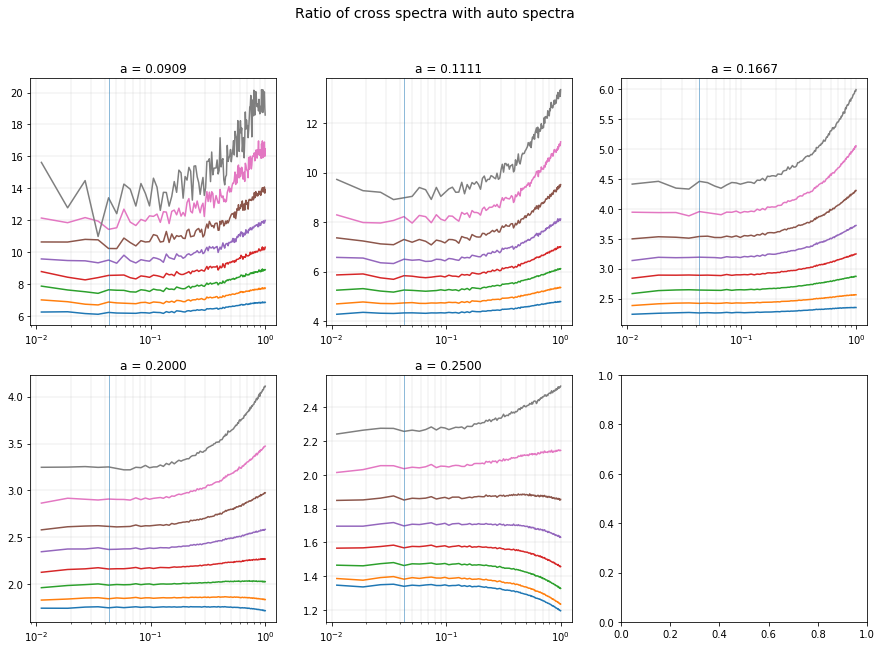

In [90]:
nkmax = 5

fig, axar = plt.subplots(2, 3, figsize = (15, 10))
for i in range(5):
    ax = axar.flatten()[i]
    ax.plot(k2, powersh2[i].T/powersm2[i].reshape(-1, 1))
    ax.set_title('a = %0.4f'%aa[i])
    ax.set_xscale('log')
    ax.axvline(k2[nkmax], lw=0.5)
    ax.grid(which='both', lw=0.2)

plt.suptitle('Ratio of cross spectra with auto spectra', fontsize=14)


/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


Text(0.5,0.98,'Bias values')

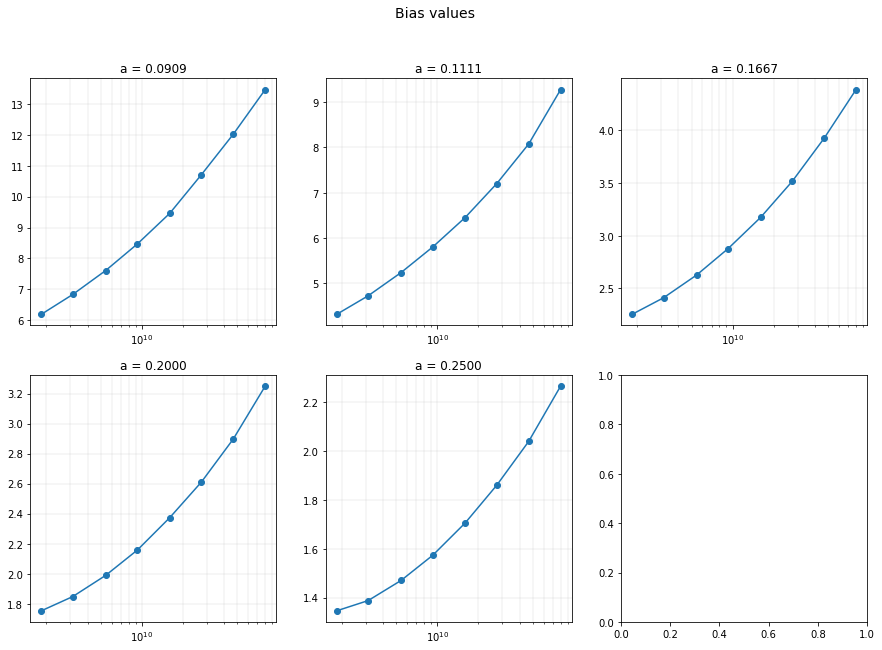

In [91]:
fig, axar = plt.subplots(2, 3, figsize = (15, 10))
bias8192 = []
for i in range(5):
    ax = axar.flatten()[i]
    bias = (powersh2[i].T/powersm2[i].reshape(-1, 1))[1:nkmax].mean(axis=0)
#     print(bias)
    ax.plot(mp*nv, bias, marker='o')
    bias8192.append([mp*nv, bias])
    ax.set_title('a = %0.4f'%aa[i])
    ax.set_xscale('log')
    ax.grid(which='both', lw=0.2)
plt.suptitle('Bias values', fontsize=14)

In [120]:
numd8192 = []
for i in range(5):
    size = hmass2[i].size
    hsort = hmass2[i][::-1]
#     numd = np.array([np.where(hmass[i] < n)[0][0] for n in nv])/bs**3
    numd = (size - np.array([np.searchsorted(hsort , n) for n in nv]))/bs2**3
    numd8192.append(numd)


Text(0.5,0.98,'Abundance')

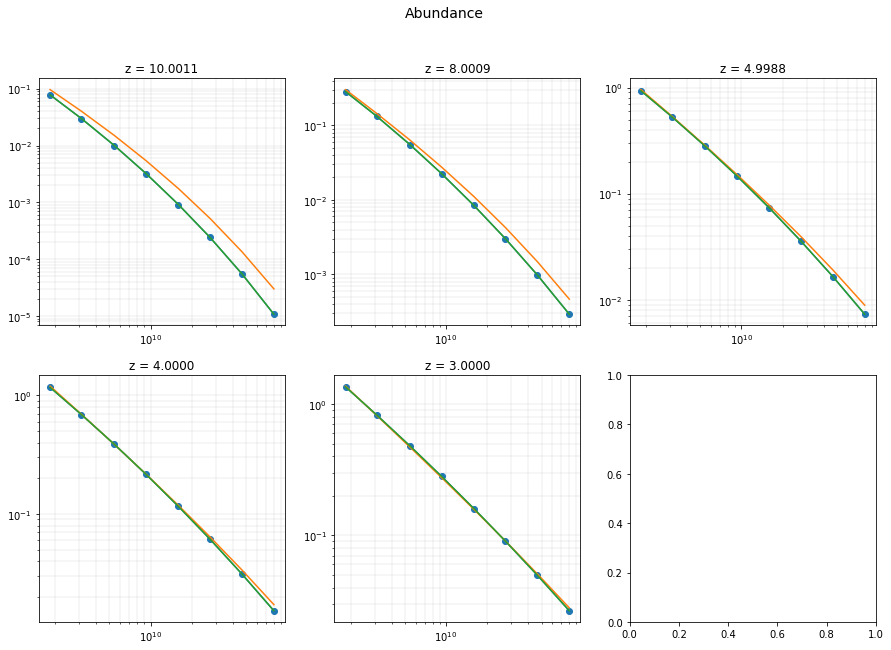

In [166]:
fig, axar = plt.subplots(2, 3, figsize = (15, 10))
for i in range(5):

    ax = axar.flatten()[i]
    numd = numd8192[i]
    stnumd = mf.STf(mp*nv, a=aa[i], dndm=True)
    #     cumsum

    ax.plot(mp*nv, numd, marker='o')
    ax.plot(mp*nv, stnumd)
    ax.plot(mp*nv, numdf2[i])
    ax.set_title('z = %0.4f'%zz[i])
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.grid(which='both', lw=0.2)
plt.suptitle('Abundance', fontsize=14)
    

Text(0.5,0.98,'Abundance')

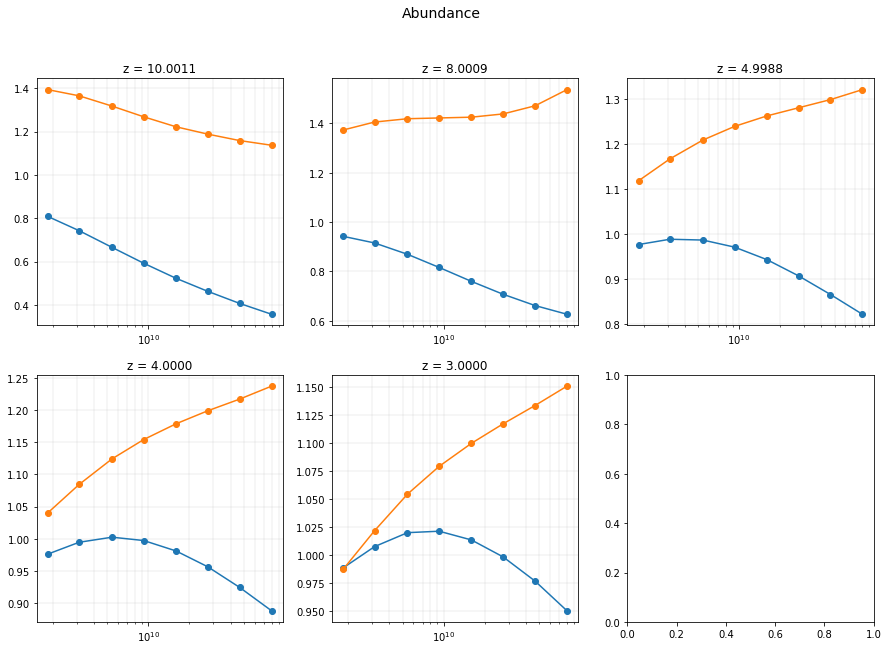

In [241]:
fig, axar = plt.subplots(2, 3, figsize = (15, 10))
for i in range(5):
    ax = axar.flatten()[i]
    numd = numd8192[i]
    stnumd = mf.STf(mp*nv, a=aa[i], dndm=True)
    #     cumsum

    ax.plot(mp*nv, numd/stnumd, marker='o')
    ax.plot(mp*nv, numd/istcumnum[i](np.log(mp*nv)), marker='o')
    #ax.plot(mp*nv, numd/np.cumsum(stnumd[::-1])[::-1], marker='o')
    ax.set_title('z = %0.4f'%zz[i])
    ax.set_xscale('log')
#     ax.set_yscale('log')
    ax.grid(which='both', lw=0.2)
plt.suptitle('Abundance', fontsize=14)
    

# Compare

In [20]:
aas = np.array([0.0909, 0.1111, 0.1667, 0.2000, 0.2500, 0.2857])
zzs = 1/aas - 1
mtest = np.logspace(8, 15, 1000)
stnumd = [mf.STf(mtest, i) for i in aa]
istcumnum = [interpolate(np.log(mtest), np.array([np.trapz(stnumd[j][i:]/mtest[i:], mtest[i:]) for i in range(mtest.size)])) for j in range(len(stnumd))]


def bM(M, aa, paper='ST', a=0.75, p=0.3, delc=1.686):
    nu=delc/mf.sigmaf(aa)(M)
    if paper == 'PS': return 1 + (a*nu**2 - 1 )/delc 
    if paper == 'ST': return 1 + (a*nu**2 - 1 )/delc + 2*p/(delc*(1 + (a*nu**2)**p))


mmtest = np.logspace(8, 15, 1000)
stbiasm = [bM(mtest, i)*mf.STf(mtest, i) for i in aas]
istcumbias = [interpolate(np.log(mtest[:-1]), np.array([np.trapz(stbiasm[j][i:]/mtest[i:], mtest[i:]) 
                                                        for i in range(mtest.size-1)])/np.array([np.trapz(stnumd[j][i:]/mtest[i:], mtest[i:])
                                                         for i in range(mtest.size-1)])) for j in range(len(stnumd))]


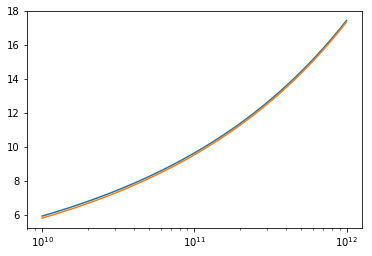

In [20]:
# plt.plot(mmtest, bM(mmtest, aa=.1, paper='ST'))
# plt.plot(mmtest, bM(mmtest, aa=.1, paper='PS'))
# plt.xscale('log')

In [80]:
         
# istcumbias = []
# for j in range(len(stnumd)):
#     istcumbias.append(interpolate(np.log(mtest), np.array([np.trapz(stbiasm[j][i:]/mtest[i:], mtest[i:]) for i in range(mtest.size)])))

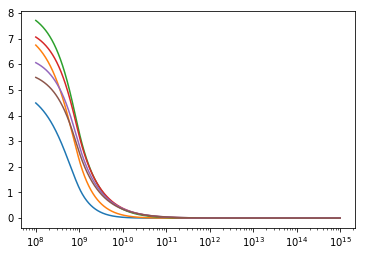

In [55]:
plt.plot(mtest, np.array(stbiasm).T)
plt.xscale('log')

Text(0.5,0.98,'Bias values Threshold')

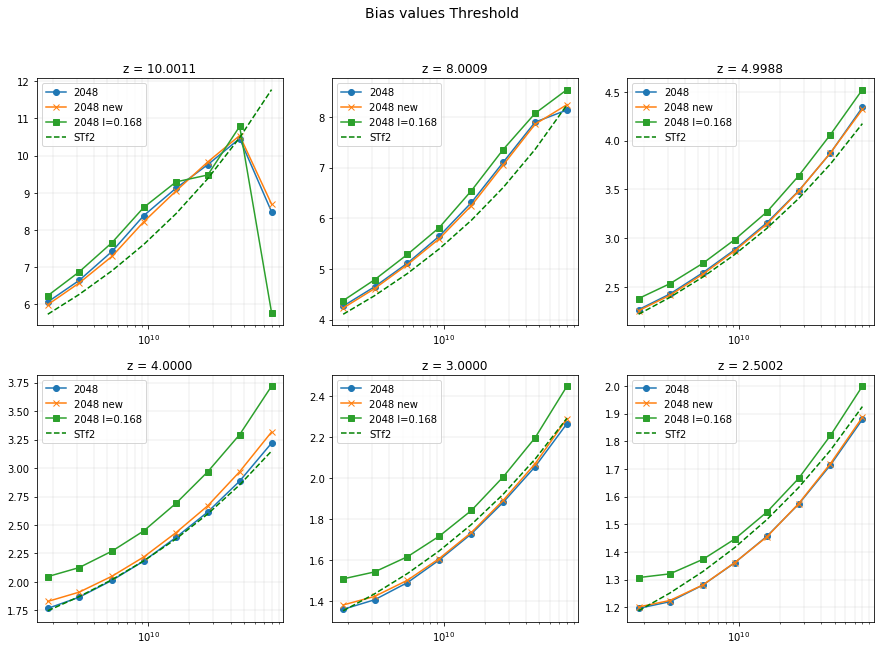

In [21]:

fig, axar = plt.subplots(2, 3, figsize = (15, 10))
for i in range(6):
    ax = axar.flatten()[i]
#     print(bias)
    ax.plot(*bias2048[i], marker='o', label='2048')
    ax.plot(*bias2048new[i], marker='x', label='2048 new')
    ax.plot(*bias2048168[i], marker='s', label='2048 l=0.168')
#     if i< 5: ax.plot(*bias8192[i], marker='x', label='8192')

#     ax.plot(mms, bM(mms, aas[i]), label='STf')
#     ax.plot(mms, bM(mms, aas[i], paper='PS'), label='PSf')
    ax.plot(mms, istcumbias[i](np.log(mms)),  'g--', label='STf2')
    ax.set_title('z = %0.4f'%zzs[i])
    ax.set_xscale('log')
    ax.grid(which='both', lw=0.2)
    ax.legend()
plt.suptitle('Bias values Threshold', fontsize=14)
# plt.savefig('./plots/biasthresh.png')


Text(0.5,0.98,'Bias values Bin')

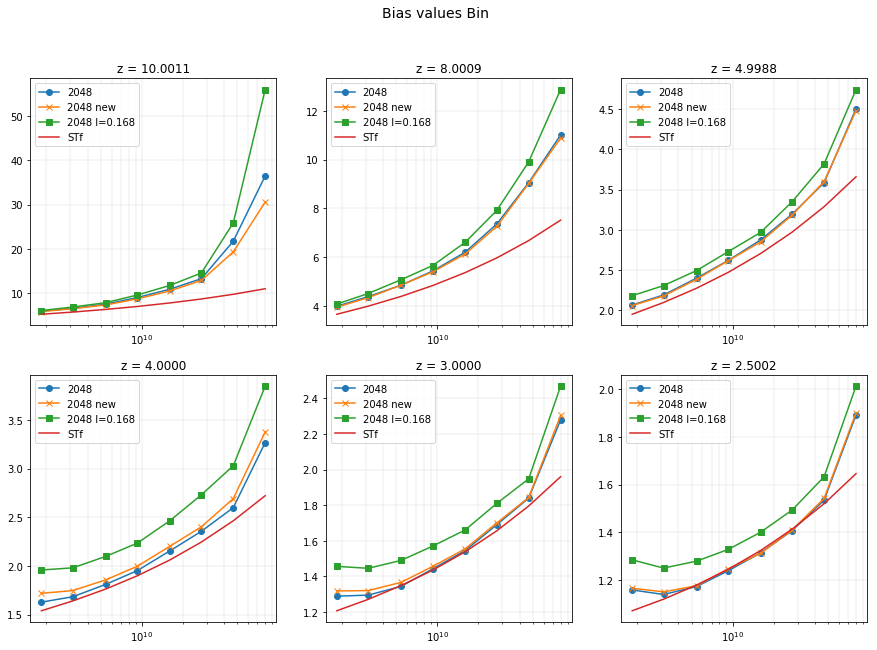

In [22]:

fig, axar = plt.subplots(2, 3, figsize = (15, 10))
for i in range(6):
    ax = axar.flatten()[i]
#     print(bias)
    ax.plot(*bias2048a[i], marker='o', label='2048')
    ax.plot(*bias2048newa[i], marker='x', label='2048 new')
    ax.plot(*bias2048168a[i], marker='s', label='2048 l=0.168')

    ax.plot(mms, bM(mms, aas[i]), label='STf')
    ax.set_title('z = %0.4f'%zzs[i])
    ax.set_xscale('log')
    ax.grid(which='both', lw=0.2)
    ax.legend()
plt.suptitle('Bias values Bin', fontsize=14)
# plt.savefig('./plots/biasbin.png')
# 

Text(0.5,0.98,'Abundance')

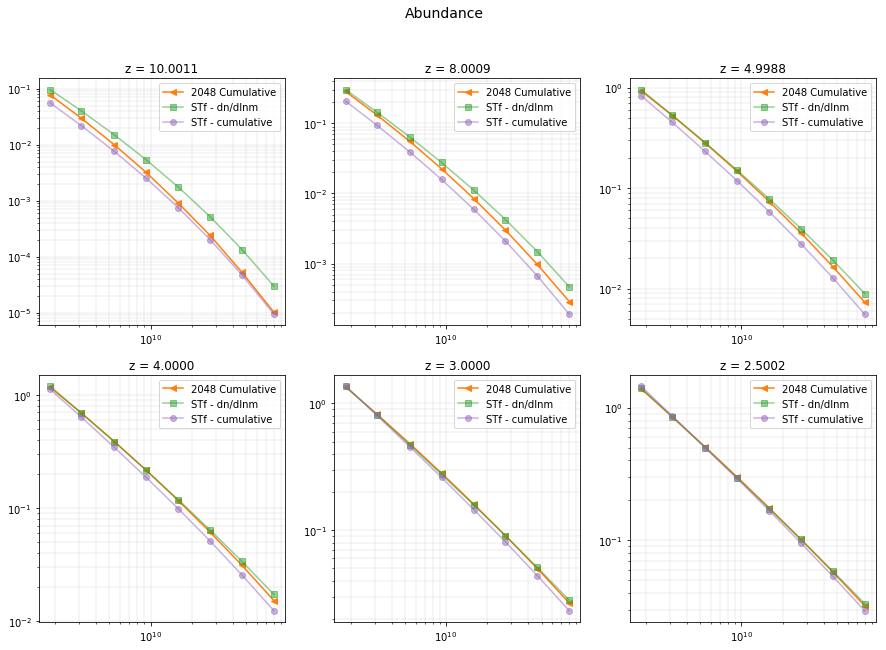

In [23]:
fig, axar = plt.subplots(2, 3, figsize = (15, 10))
for i in range(6):
    ax = axar.flatten()[i]
    stnumd = mf.STf(mp*nv, a=aa[i], dndlnm=True)
    stnumd2 = [np.trapz(stnumd[i:]/mms[i:], mms[i:]) for i in range(len(stnumd))]
#     if i < 5:
#         numd = numd8192[i]
#         ax.plot(mp*nv, numd, 'C0', marker='o', label='8192 Cumulative')
            
    numd = numd2048[i]
    ax.plot(mp*nv, numd, 'C1', marker='<', label='2048 Cumulative')
    ax.plot(mp*nv, stnumd, 'C2', marker='s', label='STf - dn/dlnm', alpha=0.5)
    ax.plot(mp*nv, istcumnum[i](np.log(mp*nv)),'C4',  marker='o', label='STf - cumulative', alpha=0.5)
#     ax.plot(mp*nv, stnumd2, 'C3', marker='x', label='STf - dn/dm')
    ax.set_title('z = %0.4f'%zz[i])
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.grid(which='both', lw=0.2)
    ax.legend()
plt.suptitle('Abundance', fontsize=14)
# plt.savefig('./plots/abundance.png')
    

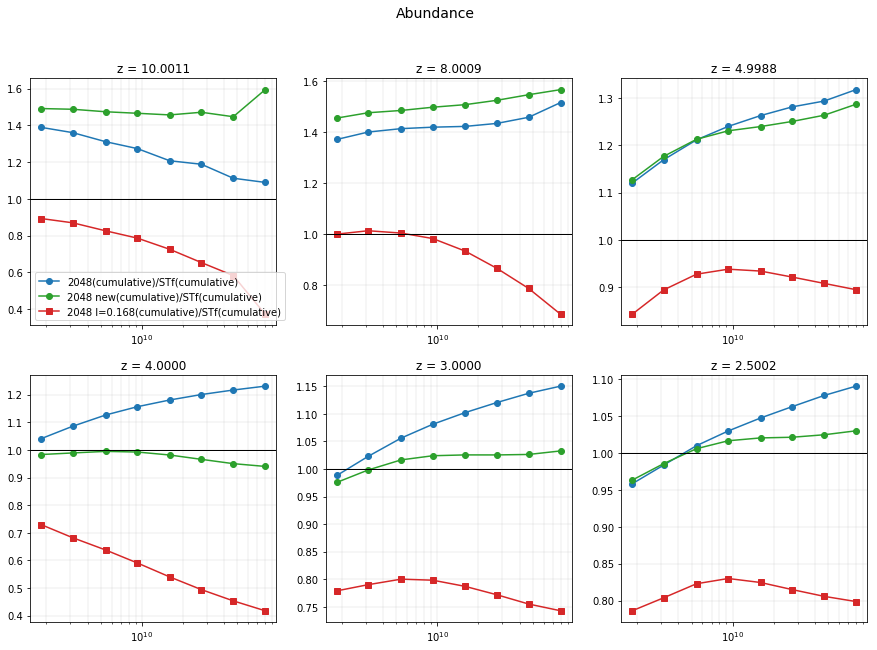

In [24]:
fig, axar = plt.subplots(2, 3, figsize = (15, 10))
for i in range(6):
    ax = axar.flatten()[i]
    stnumd = mf.STf(mp*nv, a=aa[i], dndlnm=True)
#     if i < 5:
#         numd = numd8192[i]
#         ax.plot(mp*nv, numd/stnumd, 'C0', marker='o', label='8192/STf(dn/dlnm)')
#         ax.plot(mp*nv, numd/istcumnum[i](np.log(mp*nv)), 'C0', label='8192/STf(cumulative)', marker='o')
#         ax.plot(mp*nv, numd/np.cumsum(stnumd[::-1])[::-1], 'C0', marker='o')
    
    numd = numd2048[i]
#     ax.plot(mp*nv, numd/stnumd, 'C1--', marker='x', label='2048 (cumulative)/STf (dn/dlnm bins)\nShould not match')
    ax.plot(mp*nv, numd/istcumnum[i](np.log(mp*nv)), 'C0', label='2048(cumulative)/STf(cumulative)', marker='o')
    numd = numd2048new[i]
    ax.plot(mp*nv, numd/istcumnum[i](np.log(mp*nv)), 'C2', label='2048 new(cumulative)/STf(cumulative)', marker='o')
    numd = numd2048168[i]
    ax.plot(mp*nv, numd/istcumnum[i](np.log(mp*nv)), 'C3', label='2048 l=0.168(cumulative)/STf(cumulative)', marker='s')
        
    ax.set_title('z = %0.4f'%zz[i])
    ax.set_xscale('log')
#     ax.set_yscale('log')
    ax.grid(which='both', lw=0.2)
    ax.axhline(1, lw=1, color='k')
axar[0, 0].legend()
plt.suptitle('Abundance', fontsize=14)
# plt.savefig('./plots/abundance_ratio.png')
plt.show()

In [251]:
# !mkdir plots


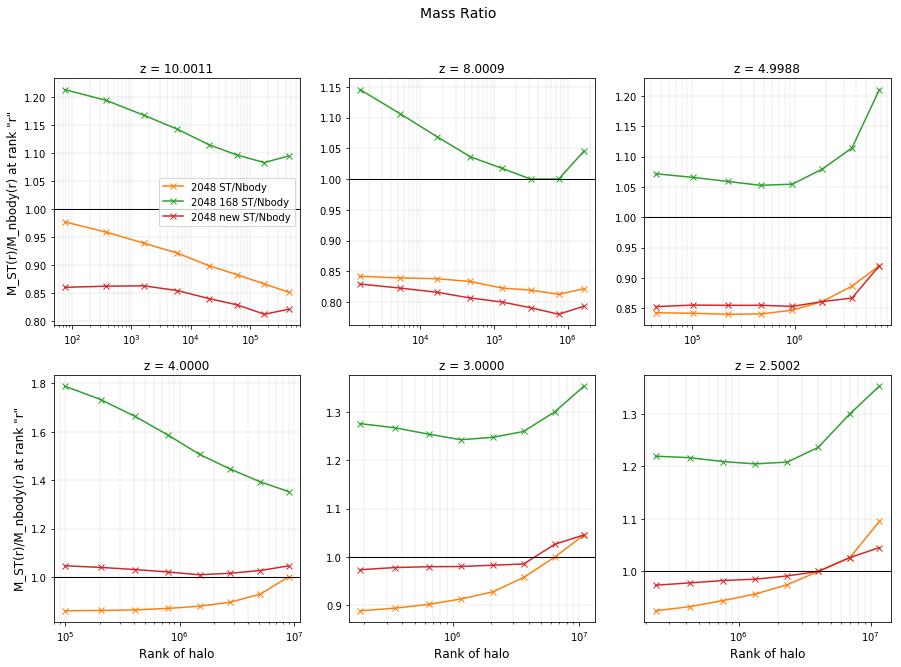

In [55]:

fig, axar = plt.subplots(2, 3, figsize = (15, 10))
for i in range(6):
    ax = axar.flatten()[i]
    stnumd = mf.STf(mp*nv, a=aa[i], dndlnm=True)
    index = np.array([int(istcumnum[i](np.log(mp*n))*bs**3) for n in nv])

    mnbody = hmass[i][index]
    ax.plot(index, nv/mnbody, 'C1-', marker='x', label='2048 ST/Nbody')

    mnbody = hmass168[i][index]
    ax.plot(index, nv/mnbody, 'C2-', marker='x', label='2048 168 ST/Nbody')

    mnbody = hmassnew[i][index]
    ax.plot(index, nv/mnbody, 'C3-', marker='x', label='2048 new ST/Nbody')

        
    ax.set_title('z = %0.4f'%zz[i])
    ax.set_xscale('log')
# #     ax.set_yscale('log')
    ax.grid(which='both', lw=0.2)
    ax.axhline(1, lw=1, color='k')
    if i > 2: ax.set_xlabel('Rank of halo', fontsize=12)
    if i ==0 or i==3: ax.set_ylabel('M_ST(r)/M_nbody(r) at rank "r"', fontsize=12)
    
axar[0, 0].legend()
plt.suptitle('Mass Ratio', fontsize=14)
# plt.savefig('./plots/mass_ratio.png')
plt.show()

In [ ]:

# fig, axar = plt.subplots(2, 3, figsize = (15, 10))
# for i in range(6):
#     ax = axar.flatten()[i]
#     stnumd = mf.STf(mp*nv, a=aa[i], dndlnm=True)
#     index = np.array([int(istcumnum[i](np.log(mp*n))*bs**3) for n in nv])

#     mnbody = hmass[i][index]
#     ax.plot(index, nv/mnbody, 'C1-', marker='x', label='2048 ST/Nbody')

#     mnbody = hmass168[i][index]
#     ax.plot(index, nv/mnbody, 'C2-', marker='x', label='2048 168 ST/Nbody')

#     mnbody = hmassnew[i][index]
#     ax.plot(index, nv/mnbody, 'C3-', marker='x', label='2048 new ST/Nbody')

# #     numd = numd2048[i]
# # #     ax.plot(mp*nv, numd/stnumd, 'C1--', marker='x', label='2048 (cumulative)/STf (dn/dlnm bins)\nShould not match')
# #     ax.plot(mp*nv, numd/istcumnum[i](np.log(mp*nv)), 'C0', label='2048(cumulative)/STf(cumulative)', marker='o')
# #     numd = numd2048new[i]
# #     ax.plot(mp*nv, numd/istcumnum[i](np.log(mp*nv)), 'C2', label='2048 new(cumulative)/STf(cumulative)', marker='o')
# #     numd = numd2048168[i]
# #     ax.plot(mp*nv, numd/istcumnum[i](np.log(mp*nv)), 'C3', label='2048 l=0.168(cumulative)/STf(cumulative)', marker='s')
        
# #     ax.set_title('z = %0.4f'%zz[i])
#     ax.set_xscale('log')
# # #     ax.set_yscale('log')
#     ax.grid(which='both', lw=0.2)
#     ax.axhline(1, lw=1, color='k')
# axar[0, 0].legend()
# plt.suptitle('Mass Ratio', fontsize=14)
# # plt.savefig('./plots/abundance_ratio.png')
# plt.show()